Summary of Missing Values:
    Missing Values  Percent
0                5     20.0
1                5     20.0
2                9     36.0
3                9     36.0
4                5     20.0
5                7     28.0
6                8     32.0
7                5     20.0
8                6     24.0
9               10     40.0
10               7     28.0
11               8     32.0
12               8     32.0
13               7     28.0
14              10     40.0
15              10     40.0
16               9     36.0
17              10     40.0
18               7     28.0
19              11     44.0
20               9     36.0
21               5     20.0
22               0      0.0


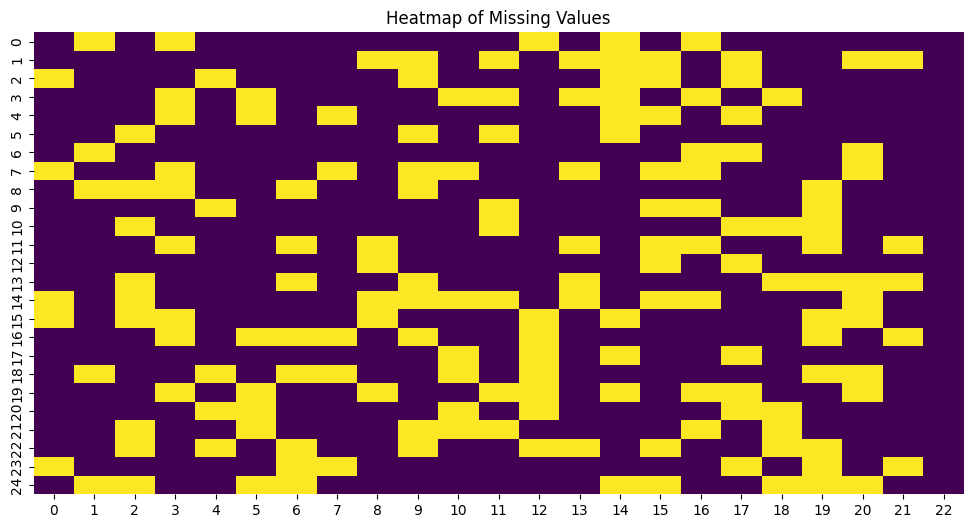

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display the first few rows of the dataset
df_with_missing.head()

# Check for missing values in each column
missing_data = df_with_missing.isnull().sum()
missing_data_percent = (missing_data / len(df_with_missing)) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percent': missing_data_percent})

print("Summary of Missing Values:")
print(missing_data_summary)

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


<Figure size 1000x600 with 0 Axes>

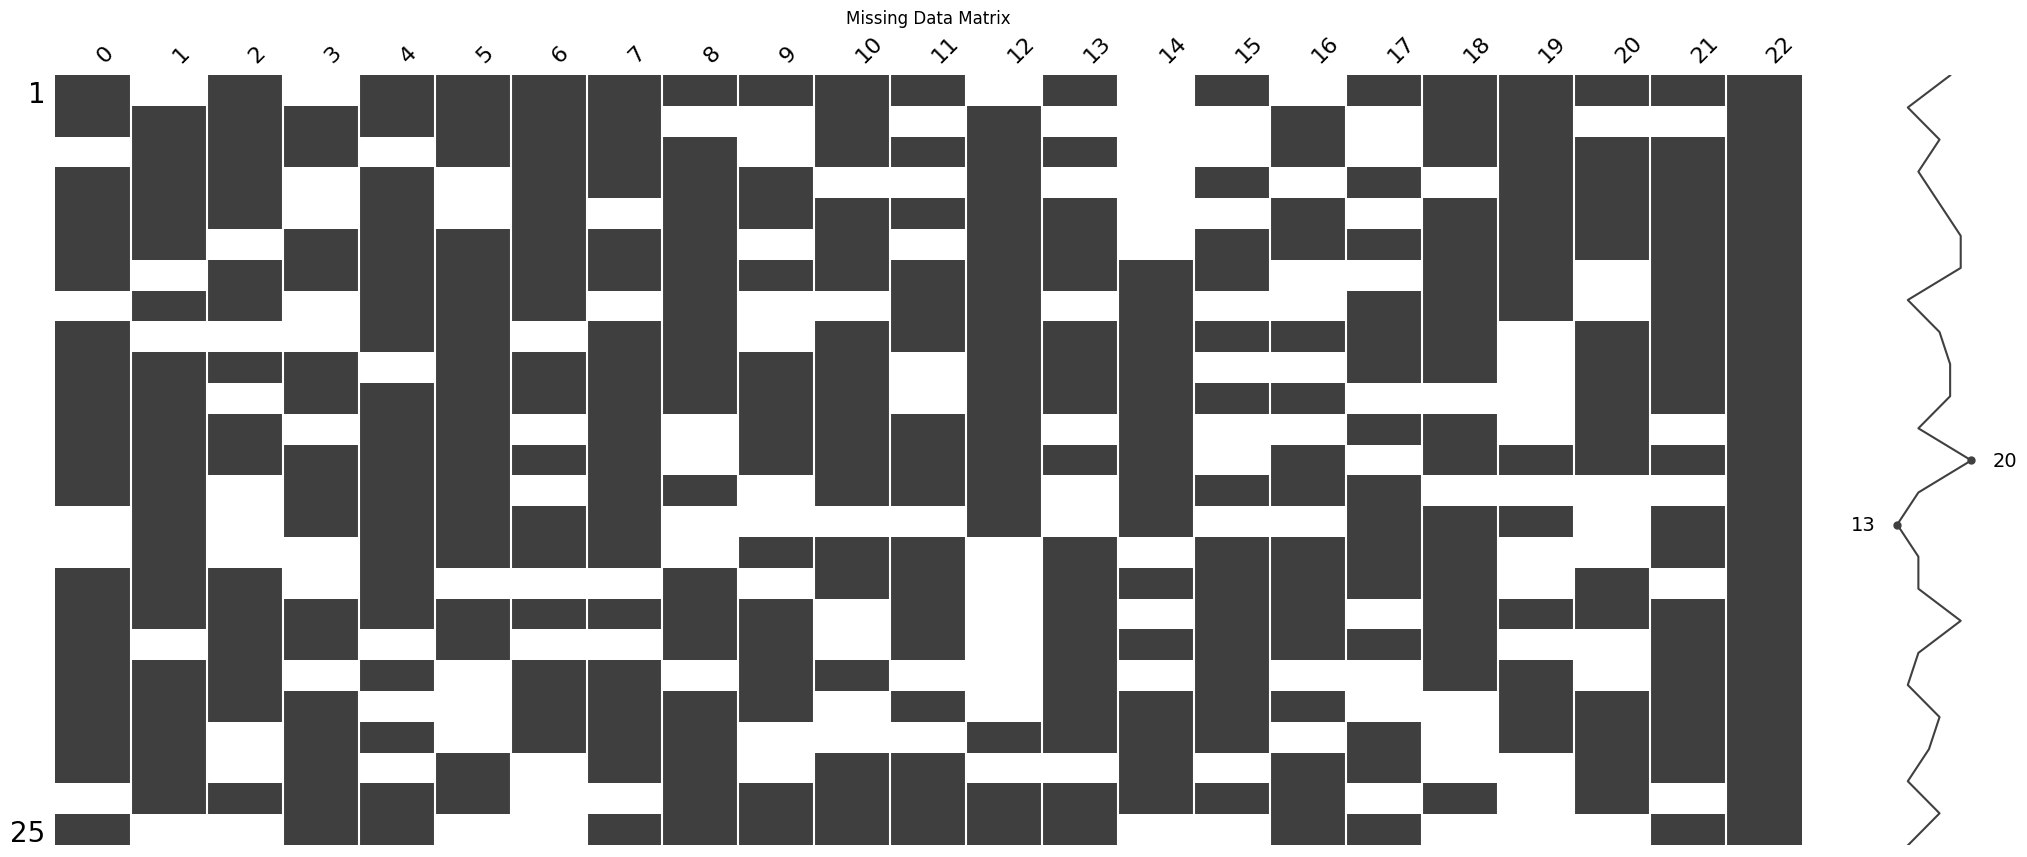

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data matrix
plt.figure(figsize=(10, 6))
msno.matrix(df_with_missing)
plt.title('Missing Data Matrix')
plt.show()


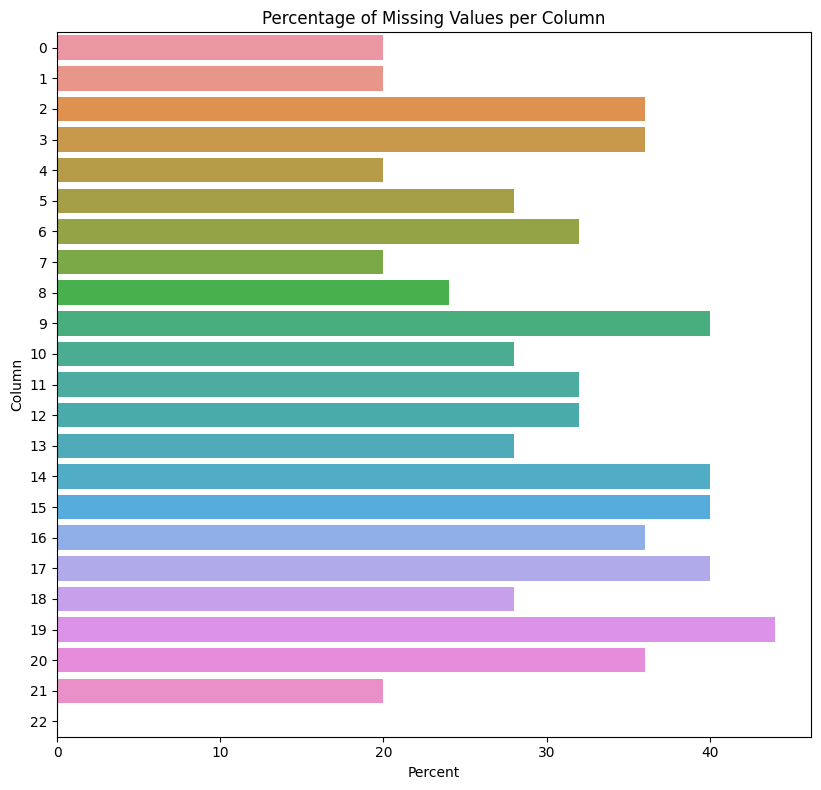

In [22]:
df=df_with_missing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Missing value summary
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
missing_summary['Percent'] = missing_summary['Missing Values'] / len(df) * 100

# Visualizations
plt.figure(figsize=(16, 8))


# Bar plot of missing percentages
plt.subplot(1, 2, 2)
sns.barplot(x='Percent', y='Column', data=missing_summary)
plt.title('Percentage of Missing Values per Column')

plt.tight_layout()
plt.show()



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df_with_missing= pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')

# Imputation Methods
# Mean Imputation
df_mean_imputed = df_with_missing.apply(lambda x: x.fillna(x.mean()), axis=0)

# Median Imputation
df_median_imputed = df_with_missing.apply(lambda x: x.fillna(x.median()), axis=0)

# Mode Imputation
df_mode_imputed = df_with_missing.apply(lambda x: x.fillna(x.mode().iloc[0]), axis=0)

# Linear Interpolation
df_linear_interpolated = df_with_missing.interpolate()

# Forward Fill
df_forward_filled = df_with_missing.fillna(method='ffill')

# Backward Fill
df_backward_filled = df_with_missing.fillna(method='bfill')

# 3. Statistical Tests
def ks_test(original, imputed, columns):
    results = {}
    for column in columns:
        if original[column].isna().sum() > 0:
            original_col = original[column].dropna()
            imputed_col = imputed[column].dropna()
            ks_stat, p_value = stats.ks_2samp(original_col, imputed_col)
            results[column] = {'KS Statistic': ks_stat, 'p-value': p_value}
    return pd.DataFrame(results).T

# Running KS tests for each imputation method
ks_test_results_mean = ks_test(df_with_missing, df_mean_imputed, df.columns)
ks_test_results_median = ks_test(df_with_missing, df_median_imputed, df.columns)
ks_test_results_mode = ks_test(df_with_missing, df_mode_imputed, df.columns)
ks_test_results_linear_interp = ks_test(df_with_missing, df_linear_interpolated, df.columns)
ks_test_results_forward = ks_test(df_with_missing, df_forward_filled, df.columns)
ks_test_results_backward = ks_test(df_with_missing, df_backward_filled, df.columns)

# Display the results
print("KS Test Results for Mean Imputation:")
print(ks_test_results_mean)

print("KS Test Results for Median Imputation:")
print(ks_test_results_median)

print("KS Test Results for Mode Imputation:")
print(ks_test_results_mode)

print("KS Test Results for Linear Interpolation:")
print(ks_test_results_linear_interp)

print("KS Test Results for Forward Fill:")
print(ks_test_results_forward)

print("KS Test Results for Backward Fill:")
print(ks_test_results_backward)


KS Test Results for Mean Imputation:
    KS Statistic   p-value
0       0.110000  0.996938
1       0.130000  0.977062
2       0.180000  0.836501
3       0.225000  0.612203
4       0.110000  0.996938
5       0.140000  0.961090
6       0.169412  0.872339
7       0.110000  0.996938
8       0.176842  0.816695
9       0.293333  0.337684
10      0.202222  0.693818
11      0.225882  0.591525
12      0.225882  0.591525
13      0.202222  0.693818
14      0.293333  0.337684
15      0.240000  0.582760
16      0.202500  0.726055
17      0.240000  0.582760
18      0.140000  0.961090
19      0.282857  0.385031
20      0.180000  0.836501
21      0.120000  0.990626
KS Test Results for Median Imputation:
    KS Statistic   p-value
0       0.100000  0.999254
1       0.100000  0.999254
2       0.180000  0.836501
3       0.180000  0.836501
4       0.100000  0.999254
5       0.140000  0.961090
6       0.150588  0.938265
7       0.100000  0.999254
8       0.113684  0.993847
9       0.186667  0.848978
10    

/tmp/ipykernel_33/3446010488.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_forward_filled = df_with_missing.fillna(method='ffill')
/tmp/ipykernel_33/3446010488.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_filled = df_with_missing.fillna(method='bfill')


/tmp/ipykernel_33/895063396.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{column_to_impute}_Forward_Fill'] = df[column_to_impute].fillna(method='ffill')
/tmp/ipykernel_33/895063396.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{column_to_impute}_Forward_Fill'] = df[column_to_impute].fillna(method='ffill')
/tmp/ipykernel_33/895063396.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{column_to_impute}_Forward_Fill'] = df[column_to_impute].fillna(method='ffill')
/tmp/ipykernel_33/895063396.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{column_to_impute}_Forward_Fill'] = df[column_to_impute].fil

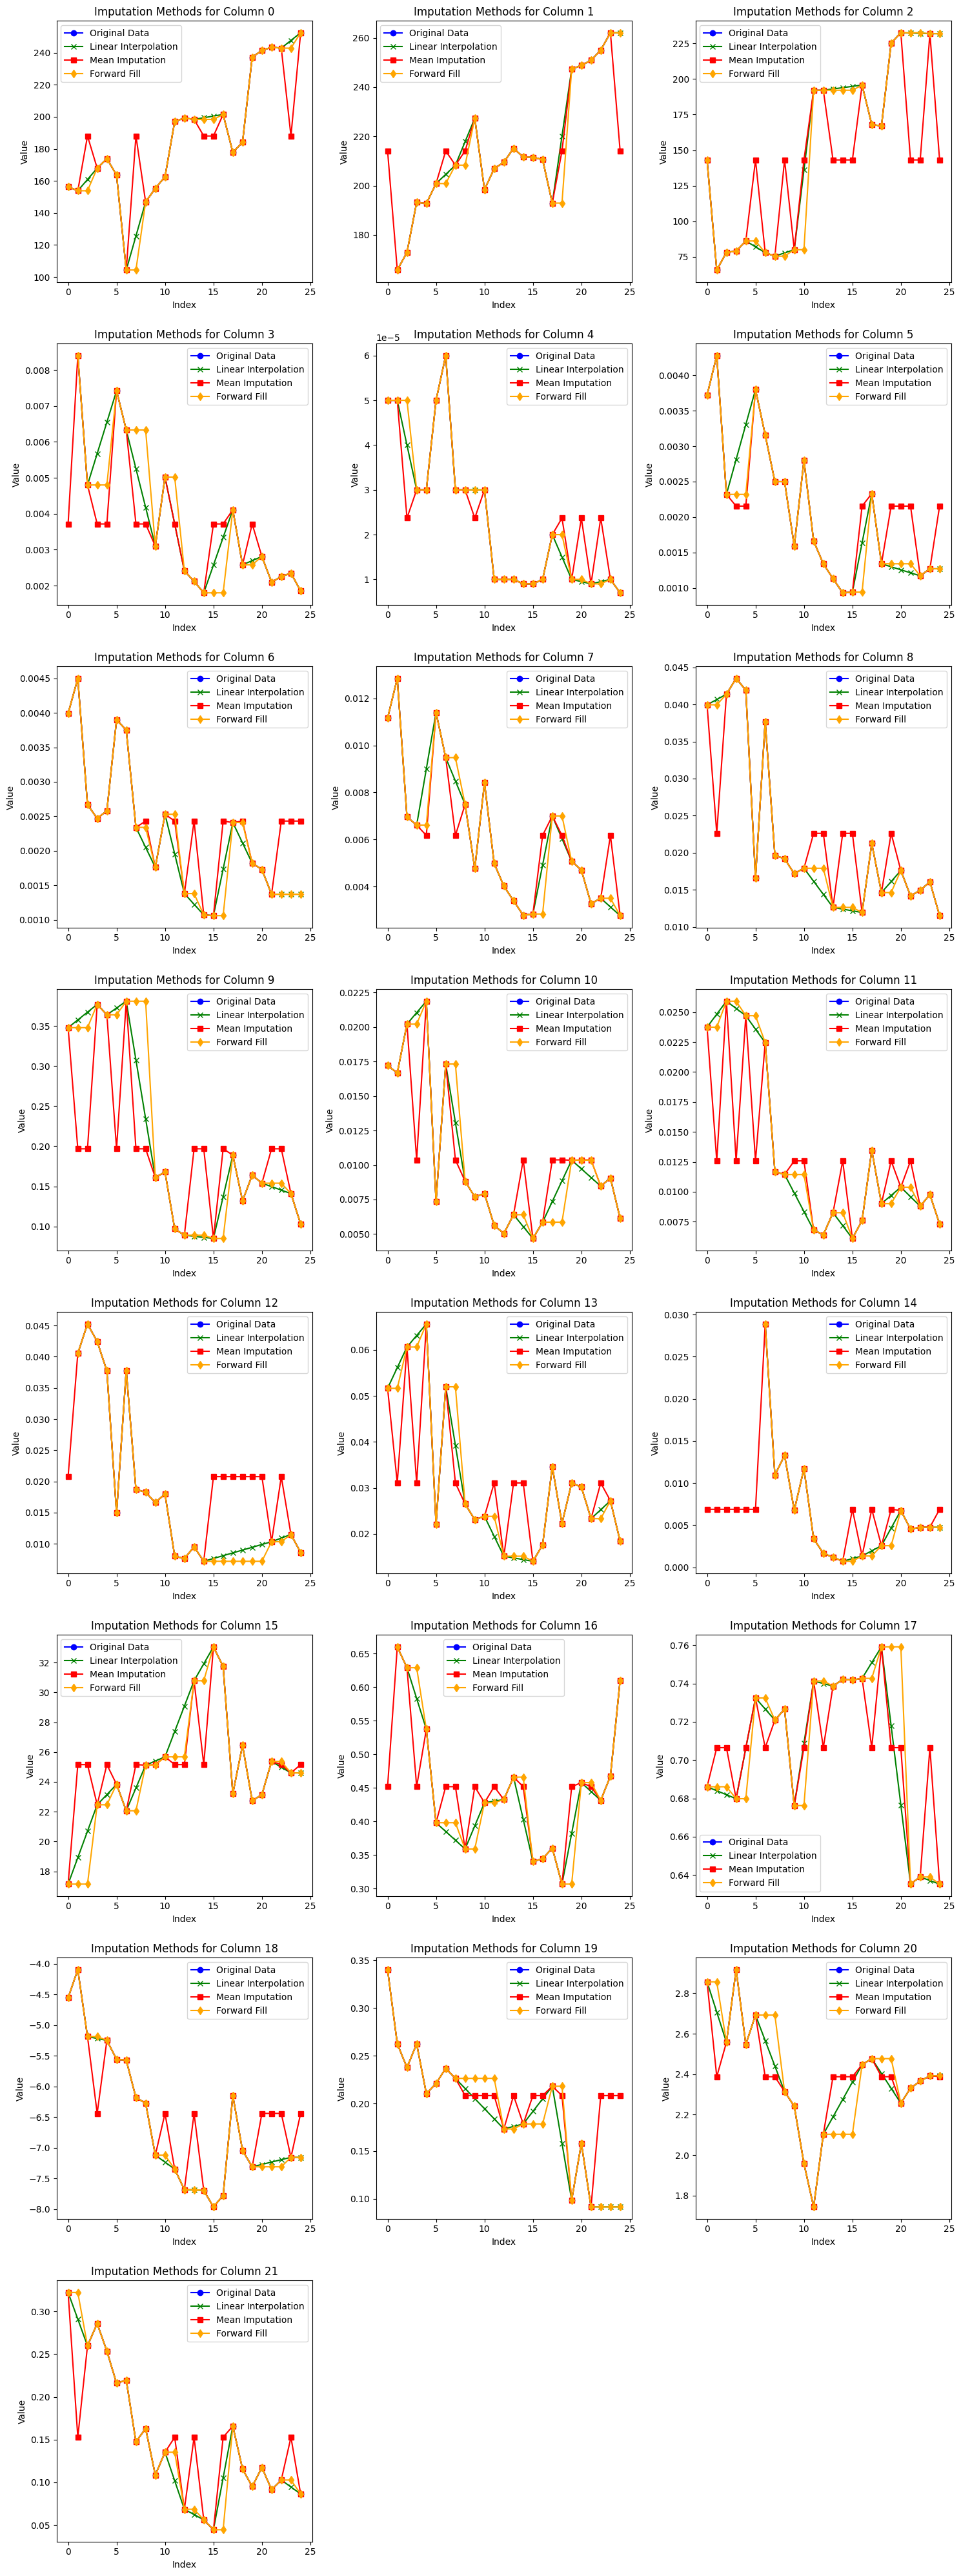

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')

# Get columns with missing values
missing_columns = df.columns[df.isna().any()]

# Calculate number of rows and columns for subplots
num_cols = 3
num_rows = (len(missing_columns) + num_cols - 1) // num_cols

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column with missing data
for i, column_to_impute in enumerate(missing_columns):
    ax = axes[i]
    
    # Create new columns for each imputation method
    df[f'{column_to_impute}_Linear_Interpolated'] = df[column_to_impute].interpolate()
    df[f'{column_to_impute}_Mean_Imputed'] = df[column_to_impute].fillna(df[column_to_impute].mean())
    df[f'{column_to_impute}_Forward_Fill'] = df[column_to_impute].fillna(method='ffill')
    
    # Plot the different imputations
    ax.plot(df.index, df[column_to_impute], 'o-', label='Original Data', color='blue')
    ax.plot(df.index, df[f'{column_to_impute}_Linear_Interpolated'], 'x-', label='Linear Interpolation', color='green')
    ax.plot(df.index, df[f'{column_to_impute}_Mean_Imputed'], 's-', label='Mean Imputation', color='red')
    ax.plot(df.index, df[f'{column_to_impute}_Forward_Fill'], 'd-', label='Forward Fill', color='orange')
    
    ax.set_title(f'Imputation Methods for Column {column_to_impute}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.legend()

# Remove any empty subplots
for j in range(len(missing_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset
df = pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')

# Get columns with missing values
missing_columns = df.columns[df.isna().any()]

# Create a dictionary to store evaluation results
results = {}

# Loop through each column with missing data
for column_to_impute in missing_columns:

    # Create a copy of the DataFrame to avoid modifying the original
    df_imputed = df.copy() 

    # Perform imputation methods
    df_imputed[f'{column_to_impute}_Linear'] = df_imputed[column_to_impute].interpolate()
    df_imputed[f'{column_to_impute}_Mean'] = df_imputed[column_to_impute].fillna(df_imputed[column_to_impute].mean())
    df_imputed[f'{column_to_impute}_Forward_Fill'] = df_imputed[column_to_impute].fillna(method='ffill')

    # Evaluation Metrics (you can add more if needed)
    results[column_to_impute] = {
        'Linear_MSE': mean_squared_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Linear']),
        'Mean_MSE': mean_squared_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Mean']),
        'Forward_Fill_MSE': mean_squared_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Forward_Fill']),
        'Linear_MAE': mean_absolute_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Linear']),
        'Mean_MAE': mean_absolute_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Mean']),
        'Forward_Fill_MAE': mean_absolute_error(df_imputed[column_to_impute], df_imputed[f'{column_to_impute}_Forward_Fill'])
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).transpose()

# Display the results DataFrame
print(results_df)

/tmp/ipykernel_33/1920839530.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[f'{column_to_impute}_Forward_Fill'] = df_imputed[column_to_impute].fillna(method='ffill')


ValueError: Input contains NaN.

In [37]:
import pandas as pd
import numpy as np

# Example DataFrame with missing values (replace this with your actual DataFrame)

df = pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')

# Perform linear interpolation with additional parameters to handle edge cases
df_interpolated = df.interpolate(method='linear', limit_direction='both')

# Ensure there are no remaining missing values
df_interpolated = df_interpolated.fillna(method='bfill').fillna(method='ffill')

# Verify that there are no missing values remaining
missing_values_after_imputation = df_interpolated.isna().sum()

print("Number of missing values after linear interpolation:")
print(missing_values_after_imputation)

# Print a confirmation message if all missing values are handled
if missing_values_after_imputation.sum() == 0:
    print("All missing values have been successfully filled.")
else:
    print("There are still missing values remaining.")


# Save the DataFrame with missing values to a CSV file
output_file = 'df_interpolated.csv'
df_interpolated.to_csv(output_file, index=False)

# Create a download link for the CSV file
FileLink(output_file)


Number of missing values after linear interpolation:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64
All missing values have been successfully filled.


/tmp/ipykernel_33/2615266234.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_interpolated.fillna(method='bfill').fillna(method='ffill')


/kaggle/working/df_interpolated.csv

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

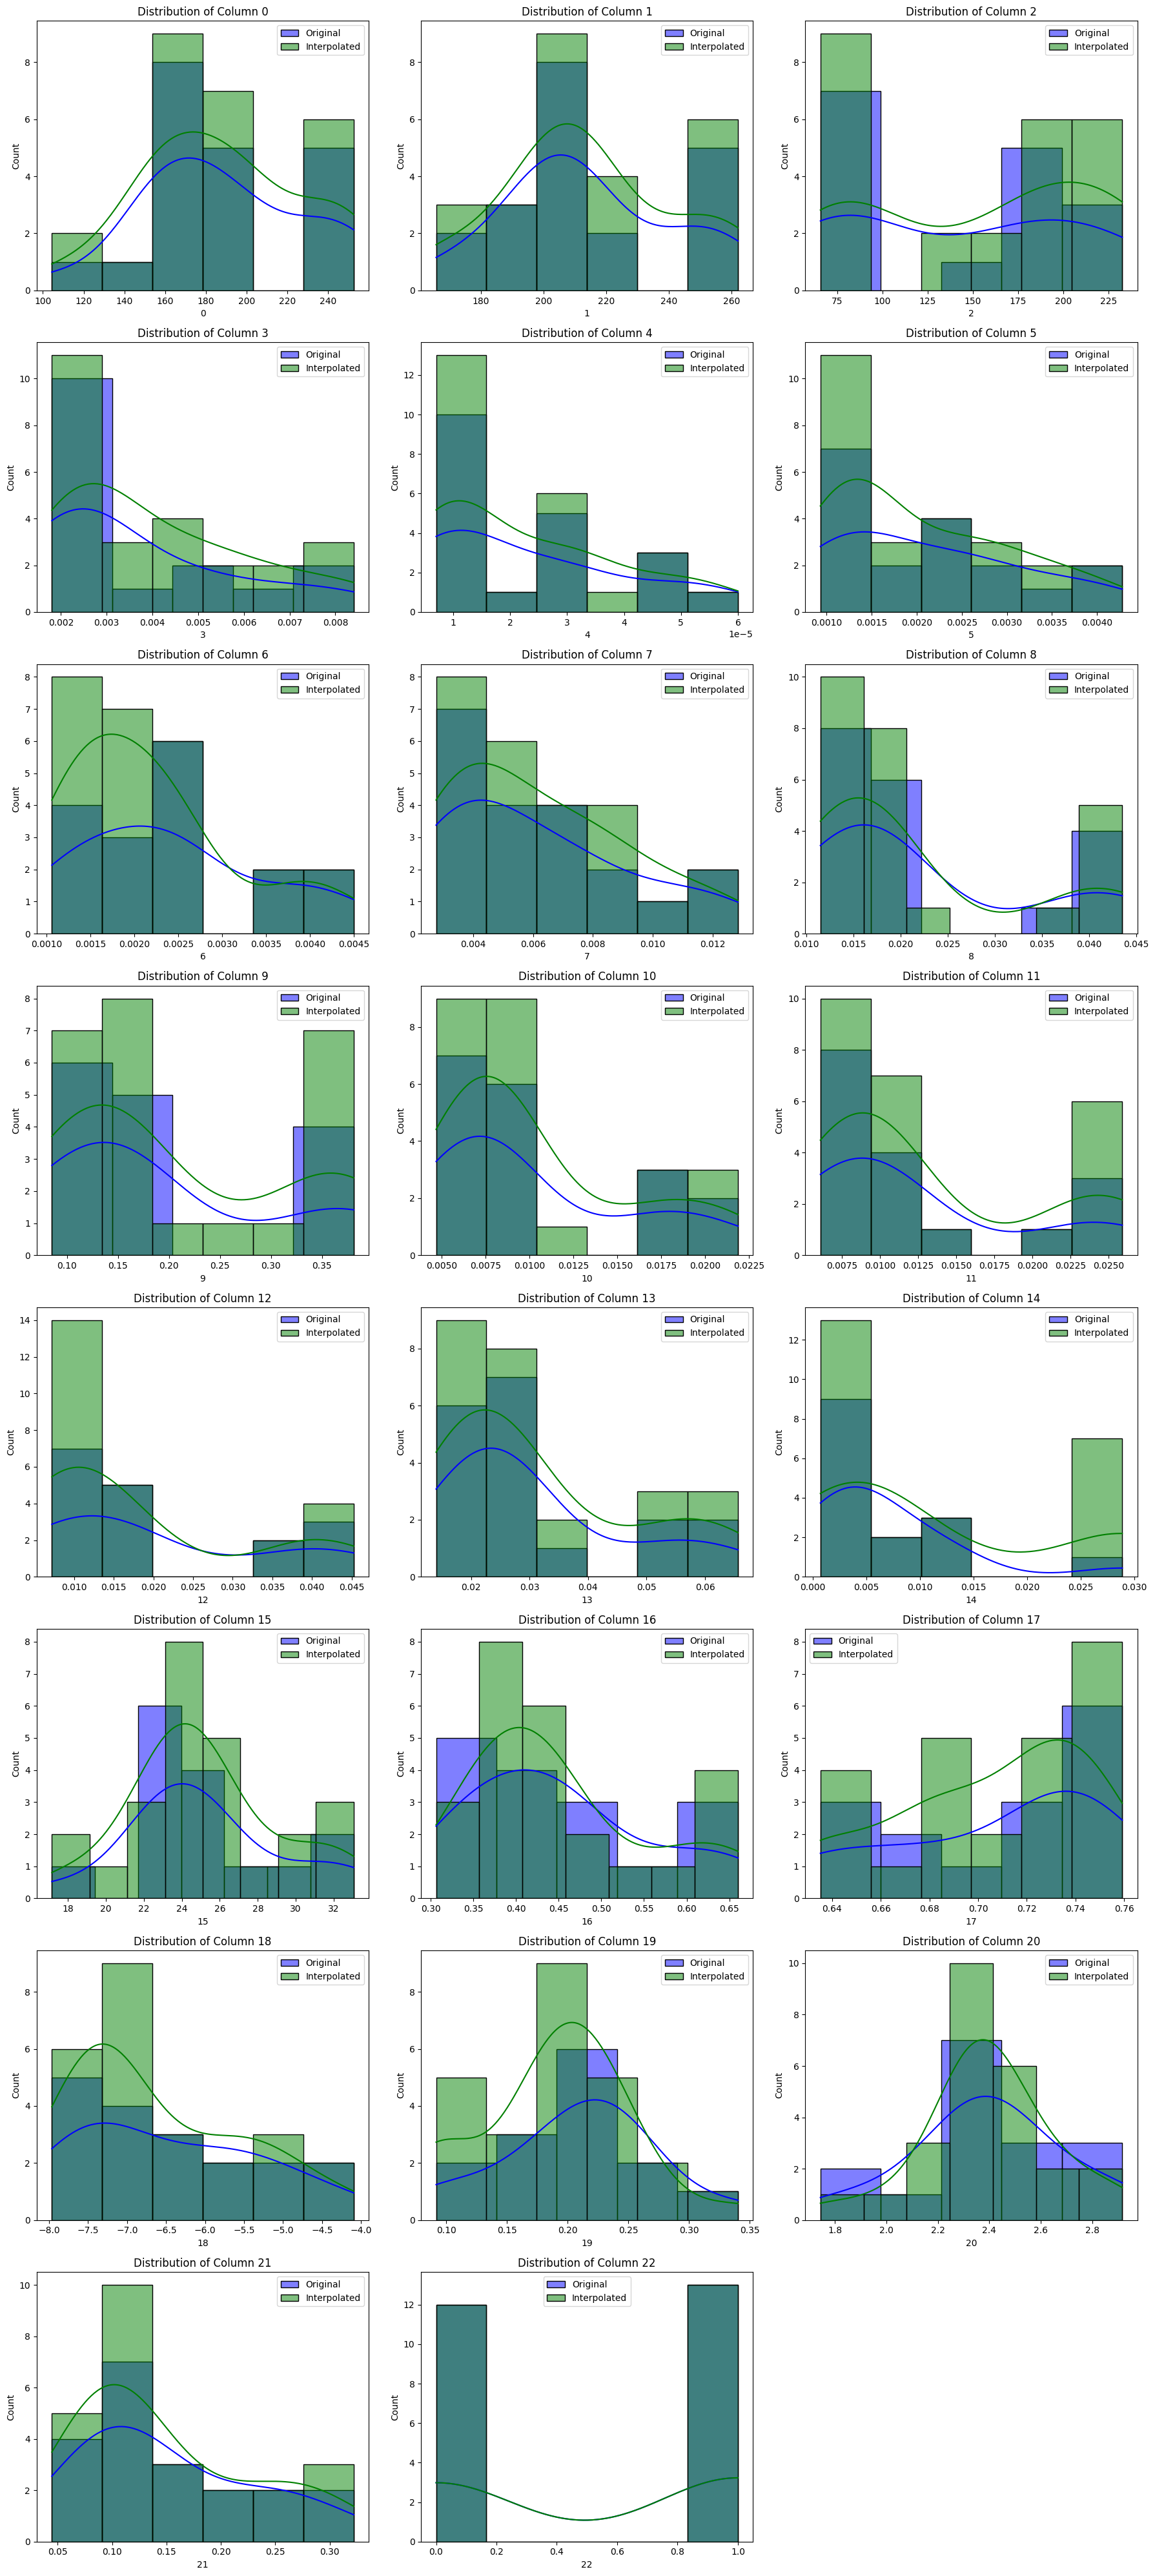

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Example DataFrame with missing values (replace this with your actual DataFrame)

df_with_missing  = pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')

df_interpolated = df_with_missing.interpolate(method='linear', limit_direction='both')

# Replace infinite values with NaN to avoid plotting issues
df_with_missing.replace([np.inf, -np.inf], np.nan, inplace=True)
df_interpolated.replace([np.inf, -np.inf], np.nan, inplace=True)

# Determine the number of numeric columns
numeric_columns = df_with_missing.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_columns)

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=(n_cols // 3) + 1, ncols=3, figsize=(18, 5 * (n_cols // 3 + 1)))
axes = axes.flatten()

# Plot histograms for each numeric column
for idx, column in enumerate(numeric_columns):
    sns.histplot(df_with_missing[column], color='blue', label='Original', kde=True, ax=axes[idx])
    sns.histplot(df_interpolated[column], color='green', label='Interpolated', kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of Column {column}')
    axes[idx].legend()

# Remove any empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


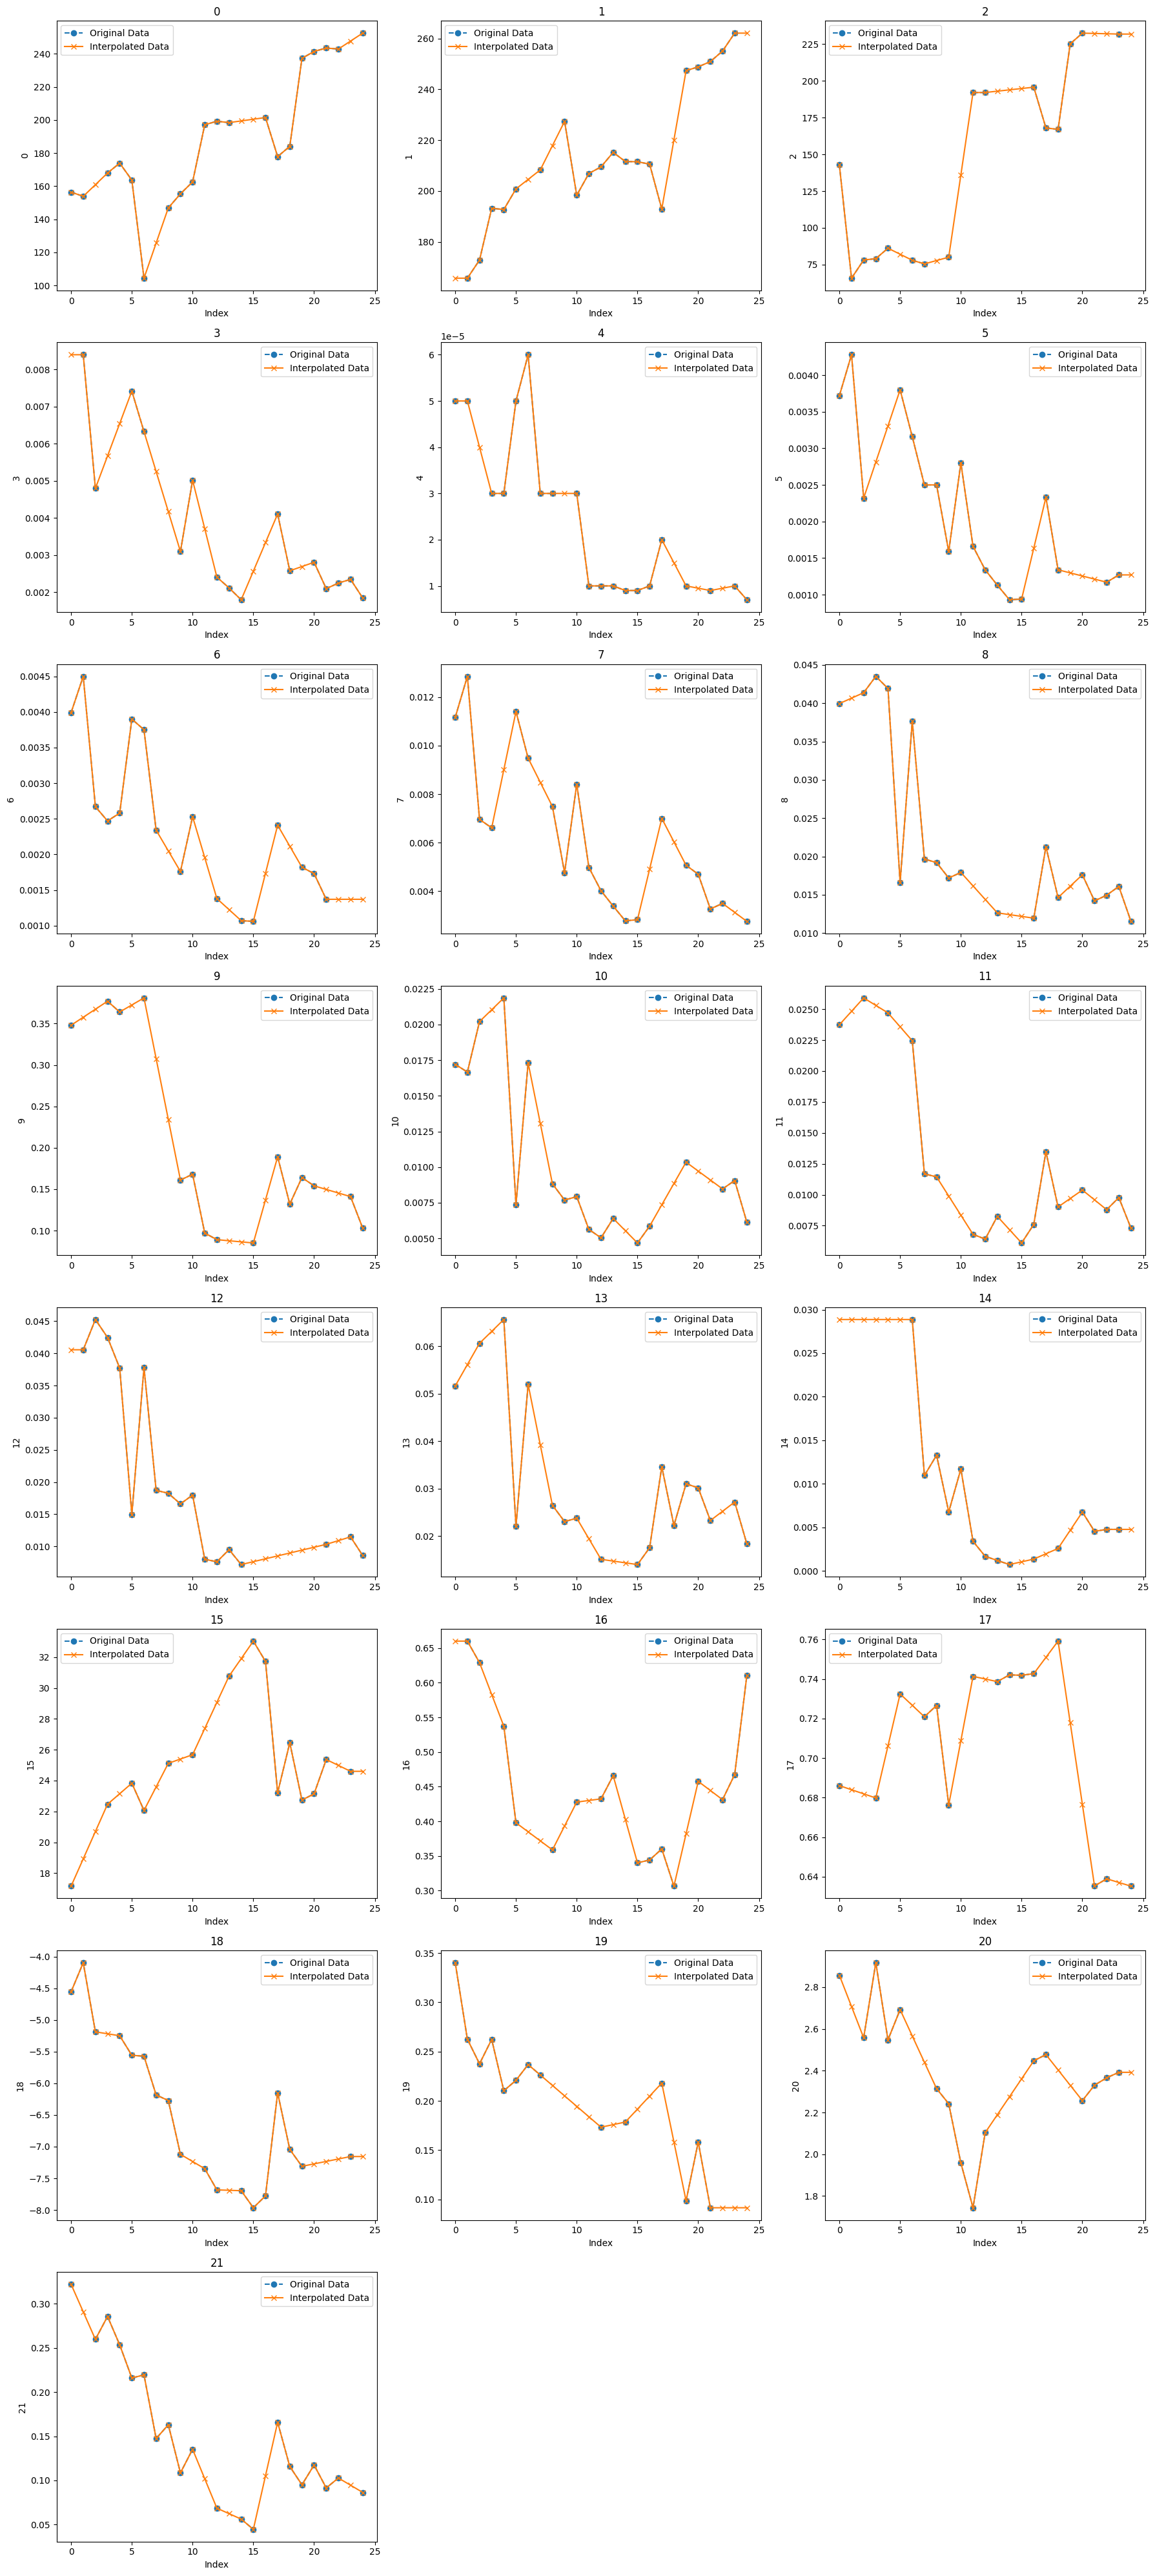

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/missing-data/df_with_missing.csv')



# Function to plot interpolation results for all columns
def plot_interpolation(original, interpolated, columns):
    n_cols = len(columns)
    n_rows = (n_cols // 3) + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        axes[idx].plot(original.index, original[column], label='Original Data', marker='o', linestyle='--')
        axes[idx].plot(interpolated.index, interpolated[column], label='Interpolated Data', marker='x', linestyle='-')
        axes[idx].set_title(f'{column}')
        axes[idx].set_xlabel('Index')
        axes[idx].set_ylabel(column)
        axes[idx].legend()

    # Remove any empty subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Select columns with missing values
columns_with_missing = df.columns[df.isna().any()]

# Plot before and after interpolation for all columns with missing values
plot_interpolation(df, df_linear_interp, columns_with_missing)
